# AI Assistance in Prescriptive Analytics: Validation is Essential

This notebook demonstrates how to use AI assistance responsibly by validating all AI-generated model components.

Understanding this is critical because:
- **AI can speed up model building** but suggestions aren't always correct
- **Human validation is essential** - AI is an assistant, not a replacement
- **Blindly accepting AI suggestions** leads to flawed models
- **Validation prevents errors** and ensures model quality


## Key Concepts

**AI Assistance**:
- Can suggest constraints, objectives, decision variables
- Can help interpret model outputs
- Speeds up model building
- But suggestions need validation

**Human Validation**:
- Check AI suggestions against business rules
- Verify constraints make sense
- Ensure objectives match goals
- Reject incorrect suggestions

**Critical insight**: AI assists, but humans decide. Always validate AI suggestions before using them.


## Scenario: Building a Staffing Model

An AI tool suggests constraints for a staffing optimization model. You need to validate each suggestion before using it.


## Step 1: Install Required Packages (Colab)


In [1]:
# Install required packages (if needed in Colab)
%pip install numpy matplotlib pandas -q



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)


## Step 3: AI Suggestions (Unvalidated)

Here are constraints an AI tool suggested based on historical data:


In [3]:
# AI-generated suggestions (simulated)
ai_suggestions = [
    {"constraint": "Min staff per shift: 5", "source": "Historical pattern", "confidence": "High"},
    {"constraint": "Max overtime hours: 10 per week", "source": "Labor regulations", "confidence": "High"},
    {"constraint": "Weekend shifts require 2x staff", "source": "Historical pattern", "confidence": "Medium"},
    {"constraint": "No staff can work > 6 days in a row", "source": "Company policy", "confidence": "High"},
    {"constraint": "Morning shifts start at 6 AM", "source": "Historical pattern", "confidence": "Medium"},
]

print("AI SUGGESTIONS (Unvalidated):")
print("=" * 60)
for i, suggestion in enumerate(ai_suggestions, 1):
    print(f"\n{i}. {suggestion['constraint']}")
    print(f"   Source: {suggestion['source']}")
    print(f"   AI Confidence: {suggestion['confidence']}")
    print(f"   ⚠️  Status: NOT VALIDATED")


AI SUGGESTIONS (Unvalidated):

1. Min staff per shift: 5
   Source: Historical pattern
   AI Confidence: High
   ⚠️  Status: NOT VALIDATED

2. Max overtime hours: 10 per week
   Source: Labor regulations
   AI Confidence: High
   ⚠️  Status: NOT VALIDATED

3. Weekend shifts require 2x staff
   Source: Historical pattern
   AI Confidence: Medium
   ⚠️  Status: NOT VALIDATED

4. No staff can work > 6 days in a row
   Source: Company policy
   AI Confidence: High
   ⚠️  Status: NOT VALIDATED

5. Morning shifts start at 6 AM
   Source: Historical pattern
   AI Confidence: Medium
   ⚠️  Status: NOT VALIDATED


## Step 4: Human Validation Process


In [4]:
# Human validation results
validation_results = [
    {"constraint": "Min staff per shift: 5", "valid": True, "notes": "Correct - matches current policy"},
    {"constraint": "Max overtime hours: 10 per week", "valid": False, "notes": "WRONG - actual limit is 8 hours per week"},
    {"constraint": "Weekend shifts require 2x staff", "valid": False, "notes": "WRONG - this was a temporary policy, no longer applies"},
    {"constraint": "No staff can work > 6 days in a row", "valid": True, "notes": "Correct - matches company policy"},
    {"constraint": "Morning shifts start at 6 AM", "valid": True, "notes": "Correct, but should note this is flexible"},
]

print("HUMAN VALIDATION RESULTS:")
print("=" * 60)
accepted = []
rejected = []
modified = []

for result in validation_results:
    status = "✅ ACCEPTED" if result['valid'] else "❌ REJECTED"
    print(f"\n{result['constraint']}")
    print(f"  {status}")
    print(f"  Notes: {result['notes']}")
    
    if result['valid']:
        accepted.append(result['constraint'])
    else:
        rejected.append(result['constraint'])

print(f"\n📊 VALIDATION SUMMARY:")
print(f"  Accepted: {len(accepted)}/{len(validation_results)}")
print(f"  Rejected: {len(rejected)}/{len(validation_results)}")
print(f"\n⚠️  {len(rejected)} incorrect suggestions would have been used without validation!")
print(f"   This would have led to a flawed model with wrong constraints.")


HUMAN VALIDATION RESULTS:

Min staff per shift: 5
  ✅ ACCEPTED
  Notes: Correct - matches current policy

Max overtime hours: 10 per week
  ❌ REJECTED
  Notes: WRONG - actual limit is 8 hours per week

Weekend shifts require 2x staff
  ❌ REJECTED
  Notes: WRONG - this was a temporary policy, no longer applies

No staff can work > 6 days in a row
  ✅ ACCEPTED
  Notes: Correct - matches company policy

Morning shifts start at 6 AM
  ✅ ACCEPTED
  Notes: Correct, but should note this is flexible

📊 VALIDATION SUMMARY:
  Accepted: 3/5
  Rejected: 2/5

⚠️  2 incorrect suggestions would have been used without validation!
   This would have led to a flawed model with wrong constraints.


## Step 5: Visualize the Validation Process


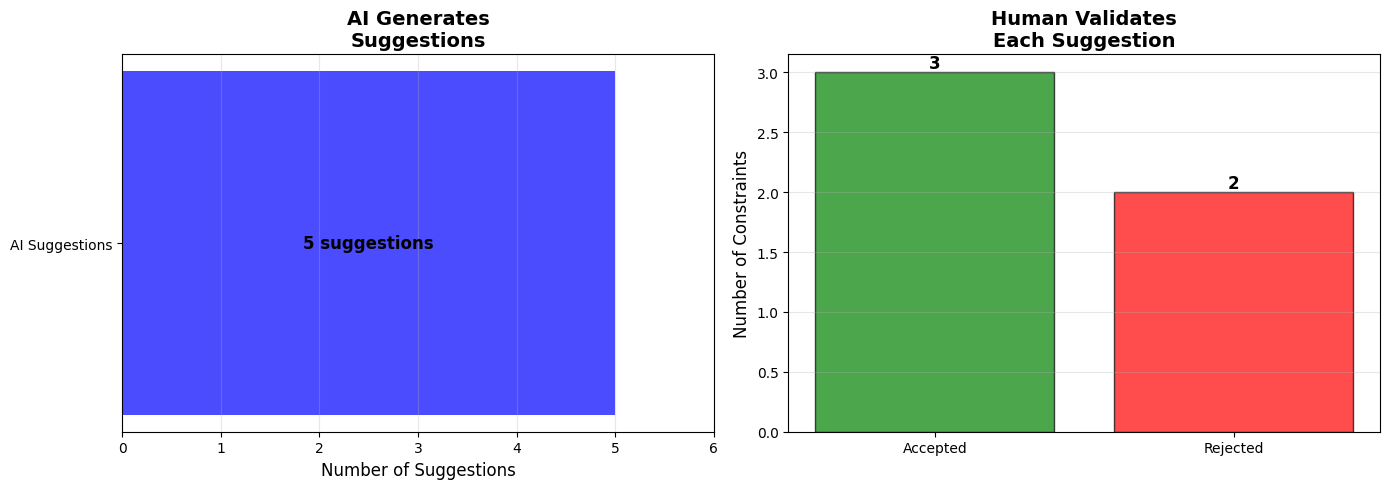


🔍 KEY INSIGHT:
   AI suggested 5 constraints
   Human validation found 2 were WRONG
   Without validation, the model would have incorrect constraints
   This would lead to bad recommendations!


In [5]:
# Visualize validation workflow
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left: AI suggestions
ax1.barh(['AI Suggestions'], [len(ai_suggestions)], color='blue', alpha=0.7)
ax1.text(len(ai_suggestions)/2, 0, f'{len(ai_suggestions)} suggestions', 
         ha='center', va='center', fontweight='bold', fontsize=12)
ax1.set_xlim(0, 6)
ax1.set_title('AI Generates\nSuggestions', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Suggestions', fontsize=12)
ax1.grid(axis='x', alpha=0.3)

# Right: Validation results
categories = ['Accepted', 'Rejected']
counts = [len(accepted), len(rejected)]
colors = ['green', 'red']
ax2.bar(categories, counts, color=colors, alpha=0.7, edgecolor='black')
ax2.set_ylabel('Number of Constraints', fontsize=12)
ax2.set_title('Human Validates\nEach Suggestion', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for i, (cat, count) in enumerate(zip(categories, counts)):
    ax2.text(i, count, str(count), ha='center', va='bottom', 
             fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

print("\n🔍 KEY INSIGHT:")
print("   AI suggested 5 constraints")
print(f"   Human validation found {len(rejected)} were WRONG")
print("   Without validation, the model would have incorrect constraints")
print("   This would lead to bad recommendations!")


## Key Takeaways

1. **AI is an assistant**: It can speed up work, but suggestions need validation.

2. **Always validate**: Check every AI suggestion against business rules and current reality.

3. **AI can be wrong**: Historical patterns may not reflect current policies or requirements.

4. **Human judgment is essential**: You understand business context; AI doesn't.

5. **Validation prevents errors**: Catching incorrect suggestions before implementation saves time and prevents bad decisions.

**Next steps**: In the next notebook, we'll see how AI suggestions can contain bias.
